In [1]:
import shutil as st
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from matplotlib import pyplot as plt
import umap.umap_ as umap
import umap.plot as up

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from bokeh.plotting import show, save, output_notebook, output_file

In [3]:
%pip install umap-learn[plot]


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
dataset = fetch_20newsgroups(subset='all' , shuffle=True)
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
category_labels = [dataset.target_names[x] for x in dataset.target]
hover_df = pd.DataFrame(category_labels, columns = ['category'])

In [10]:
hover_df

,category
0,rec.sport.hockey
1,comp.sys.ibm.pc.hardware
2,talk.politics.mideast
3,comp.sys.ibm.pc.hardware
4,comp.sys.mac.hardware
...,...
18841,sci.med
18842,sci.electronics
18843,comp.sys.ibm.pc.hardware
18844,comp.graphics


In [6]:
vectorizer = CountVectorizer(min_df=5, stop_words='english')
word_doc_matrix = vectorizer.fit_transform(dataset.data)

In [12]:
vectorizer
word_doc_matrix

<18846x34880 sparse matrix of type '<class 'numpy.int64'>'
	with 1939023 stored elements in Compressed Sparse Row format>

In [7]:
embedding = umap.UMAP(n_components=2, metric='cosine').fit(word_doc_matrix)

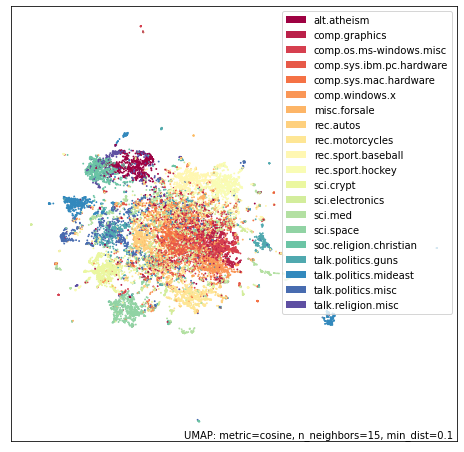

In [8]:
f = up.points(embedding, labels=hover_df['category'])